<a href="https://colab.research.google.com/github/Alex-Ukraine/ml-selfedu/blob/main/autoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow import keras
from tensorflow.keras.layers import Dense, Flatten, Reshape, Input

In [4]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train / 255
x_test = x_test / 255

x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

11493376/11490434 [==============================] - 0s 0us/step


In [5]:
input_img = Input((28, 28, 1)) # это слой

# сеть строим в виде связанного графа, 
# слой связываем его с предыдущим слоем
x = Flatten()(input_img) # вытягиваем вектор
x = Dense(128, activation='relu')(x)
x = Dense(64, activation='relu')(x)
# коллекция входных слоёв автоэнкодера
encoded = Dense(49, activation='relu')(x) # слой(вектор) скрытого состояния

d = Dense(64, activation='relu')(encoded)
d = Dense(28*28, activation='sigmoid')(d) # входные данные тоже от 0 до 1
decoded = Reshape((28, 28, 1))(d) # коллекция выходных слоёв автоэнкодера

# формируем модель автоэнкодера
autoencoder = keras.Model(input_img, decoded, name="autoencoder") 
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

In [6]:
batch_size = 100

autoencoder.fit(x_train, x_train, # автоэнкодер будет стараться восстанавливать наше изображение
                epochs=20,
                batch_size=batch_size,
                shuffle=True)

Epoch 1/20
600/600 [==============================] - 3s 5ms/step - loss: 0.0429
Epoch 2/20
600/600 [==============================] - 3s 5ms/step - loss: 0.0203
Epoch 3/20
600/600 [==============================] - 3s 5ms/step - loss: 0.0161
Epoch 4/20
600/600 [==============================] - 3s 5ms/step - loss: 0.0138
Epoch 5/20
600/600 [==============================] - 3s 5ms/step - loss: 0.0124
Epoch 6/20
600/600 [==============================] - 3s 5ms/step - loss: 0.0116
Epoch 7/20
600/600 [==============================] - 3s 5ms/step - loss: 0.0110
Epoch 8/20
600/600 [==============================] - 3s 5ms/step - loss: 0.0105
Epoch 9/20
600/600 [==============================] - 3s 5ms/step - loss: 0.0100
Epoch 10/20
600/600 [==============================] - 3s 5ms/step - loss: 0.0096
Epoch 11/20
600/600 [==============================] - 3s 5ms/step - loss: 0.0092
Epoch 12/20
600/600 [==============================] - 3s 5ms/step - loss: 0.0090
Epoch 13/20
600/600 [====

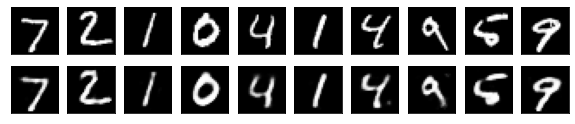

In [9]:
# отобразим первые 10 изображений из обучающей выборки
n = 10
imgs = x_test[:n]
decoded_imgs = autoencoder.predict(x_test[:n], batch_size=n)

plt.figure(figsize=(n, 2))
for i in range(n):
    ax = plt.subplot(2, n, i+1)
    plt.imshow(imgs[i].squeeze(), cmap='gray') # удалим посленюю размерность, ((28, 28, 1)) - последний цыетовой канал
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax2 = plt.subplot(2, n, i+n+1)
    plt.imshow(decoded_imgs[i].squeeze(), cmap='gray')
    ax2.get_xaxis().set_visible(False)
    ax2.get_yaxis().set_visible(False)

In [11]:
# отобразим изображение в консоли
def plot_digits(*images):
    images = [x.squeeze() for x in images] # убираем компоненту
    n = images[0].shape[0] # число изображений

    plt.figure(figsize=(n, 1))
    # в цикле отображаем
    for j in range(n):
        ax = plt.subplot(1, n, j + 1)
        plt.imshow(images[0][j])
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

    plt.show()

def plot_homotopy(frm, to, n=10, autoencoder=None):
    z = np.zeros(([n] + list(frm.shape)))
    for i, t in enumerate(np.linspace(0., 1., n)):
        # последовательно от начального изображения переходим к конечному изображению
        z[i] = frm * (1-t) + to * t # Гомотопия по прямой
    if autoencoder:
        # на выходе декодер восстановит изображение в соответствии с полученной моделью 
        plot_digits(autoencoder.predict(z, batch_size=n))
    else:
        plot_digits(z)

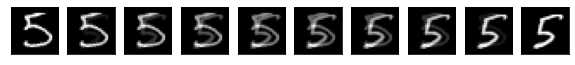

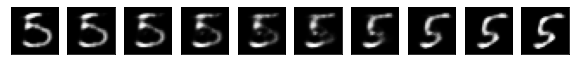

In [13]:
frm, to = x_test[y_test == 5][1:3]
plot_homotopy(frm, to)
plot_homotopy(frm, to, autoencoder=autoencoder)

результат можно постараться улучшить, используя свётрочную нейронную сеть, и увеличив размер вектора скрытого состояния.

Но в селдующем занятии мы рассмотрим другую технику компактного представления входных данных в векторе скрытого состояния с помощью Вариационного Автоэнкодера.